In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
df=pd.read_excel("D:/Programming/DATA - SCIENCE/oil_data/Chapter 5/K-Nearest Neighbor (KNN)/Chapter5_HR_DataSet.xlsx")

In [3]:
df

,Late show up percentage,Project initiative percentage,Percentage of project delivery on time,Percentage of emails exchanged,Percentage of responsiveness,Percentage of professional email response,Percentage of sharing ideas,Percentage of helping colleagues,Percentage of entrepreneurial posts on LinkedIn,Percentage of Facebook comments,Quitting
0,0.477912,0.517593,0.255846,0.446856,0.348797,0.064235,0.327526,0.231719,0.338214,0.471767,1
1,0.298068,0.403864,0.234836,0.490999,0.456119,0.274872,0.268036,0.480550,0.168622,0.680091,0
2,0.353470,0.545904,0.483996,0.509837,0.907533,0.326371,0.938657,0.575397,0.389811,0.514970,0
3,0.684900,0.678940,0.310686,0.490986,0.619742,0.436264,0.785889,0.727165,0.761269,0.409326,1
4,0.714167,0.365101,0.294082,0.392456,0.687196,0.314229,0.578492,0.233666,0.722546,0.621463,1
...,...,...,...,...,...,...,...,...,...,...,...
995,0.540622,0.425615,0.439613,0.363198,0.540406,0.230579,0.318439,0.013646,0.494684,0.565135,1
996,0.259226,0.369436,0.496785,0.470391,0.823357,0.717082,0.536417,0.278421,0.390341,0.816257,0
997,0.621092,0.388595,0.393724,0.548295,0.438829,0.443107,0.064574,0.060641,0.364369,0.594624,1
998,0.588408,0.301913,0.152232,0.390393,0.968955,0.485200,0.395298,0.512713,0.599986,0.437207,1


## we did the feature distrubution plots on logistic regression

## how it works:
- it calculate the distance between data_point you give and all the training data.
- according to the n_neighbors it choose the least (n _ distances ) and find the magority class there
- the prediction is the magority class

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
s=StandardScaler()
standarized = s.fit_transform(df.drop("Quitting",axis=1))
df_s=pd.DataFrame(standarized,columns=df.columns[0:-1])

In [6]:
df_s

,Late show up percentage,Project initiative percentage,Percentage of project delivery on time,Percentage of emails exchanged,Percentage of responsiveness,Percentage of professional email response,Percentage of sharing ideas,Percentage of helping colleagues,Percentage of entrepreneurial posts on LinkedIn,Percentage of Facebook comments
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510
...,...,...,...,...,...,...,...,...,...,...
995,0.211653,-0.312490,0.065163,-0.259834,0.017567,-1.395721,-0.849486,-2.604264,-0.139347,-0.069602
996,-1.292453,-0.616901,0.369613,0.482648,1.569891,1.273495,0.362784,-1.242110,-0.679746,1.473448
997,0.641777,-0.513083,-0.179205,1.022255,-0.539703,-0.229680,-2.261339,-2.362494,-0.814261,0.111597
998,0.467072,-0.982786,-1.465194,-0.071465,2.368666,0.001269,-0.422041,-0.036777,0.406025,-0.855670


In [7]:
X=df_s
Y=df["Quitting"]

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [9]:
np.random.seed(1000)
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.3)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
accuracy=[]
for i in range(1,51):
    knn=KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    accuracy.append(accuracy_score(y_test,y_pred))

<AxesSubplot:>

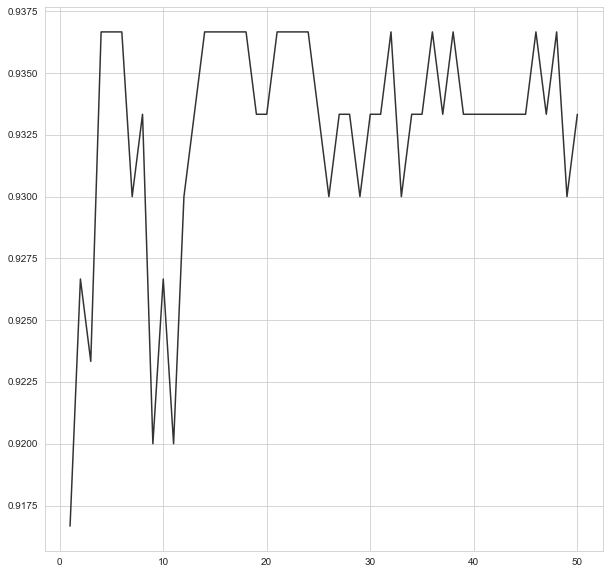

In [12]:
n=[x for x in range(1,51)]
plt.figure(figsize=(10,10))
sns.lineplot(x=n,y=accuracy,color="#333")





              precision    recall  f1-score   support

           0       0.93      0.94      0.94       151
           1       0.94      0.93      0.94       149

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



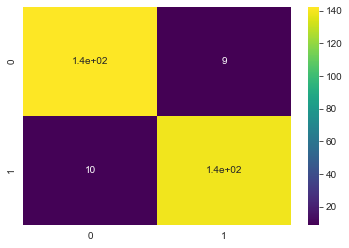

In [48]:
# the largest accuracy is in k=5
from sklearn.metrics import classification_report,confusion_matrix
np.random.seed(100)
KNN=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
KNN.fit(x_train,y_train)
y_pred=KNN.predict(x_test)
print('\n')
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="viridis")
print('\n')
print(classification_report(y_test,y_pred))
